In [1]:

%pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and the date range
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2010-01-01'
end_date = '2020-01-01'

# Download data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465667  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351058  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393280  447610800


In [3]:
# Extract the adjusted closing prices
adjusted_close = stock_data['Adj Close']

# Calculate daily returns
daily_returns = adjusted_close.pct_change().dropna()

# Display the first few rows of daily returns
print(daily_returns.head())


Date
2010-01-05    0.001729
2010-01-06   -0.015907
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008822
Name: Adj Close, dtype: float64


In [5]:
%pip install hmmlearn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.2 MB/s eta 0:00:00


In [6]:
from hmmlearn import hmm
import numpy as np

# Reshape daily returns to fit the model
returns = daily_returns.values.reshape(-1, 1)

# Create and fit the Gaussian HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
model.fit(returns)

# Print model parameters
print("Means:", model.means_)
print("Covariances:", model.covars_)


Means: [[-0.00097693]
 [ 0.00172313]]
Covariances: [[[0.0007184 ]]

 [[0.00013131]]]


In [7]:
# Extract means and covariances of the hidden states
means = model.means_
covariances = model.covars_

# Print mean and variance for each hidden state
for i in range(len(means)):
    print(f"Hidden State {i+1}: Mean = {means[i][0]}, Variance = {covariances[i][0][0]}")


Hidden State 1: Mean = -0.000976928774534452, Variance = 0.0007184023448836992
Hidden State 2: Mean = 0.001723133410265507, Variance = 0.00013130722948264753


In [8]:
# Predict the hidden states
hidden_states = model.predict(returns)

# Display the first few hidden states
print("Inferred Hidden States:", hidden_states[:10])


Inferred Hidden States: [1 1 1 1 1 1 1 1 0 0]


In [9]:
# Get the transition matrix
transition_matrix = model.transmat_

# Print the transition matrix
print("Transition Matrix:\n", transition_matrix)


Transition Matrix:
 [[0.82194813 0.17805187]
 [0.05492182 0.94507818]]


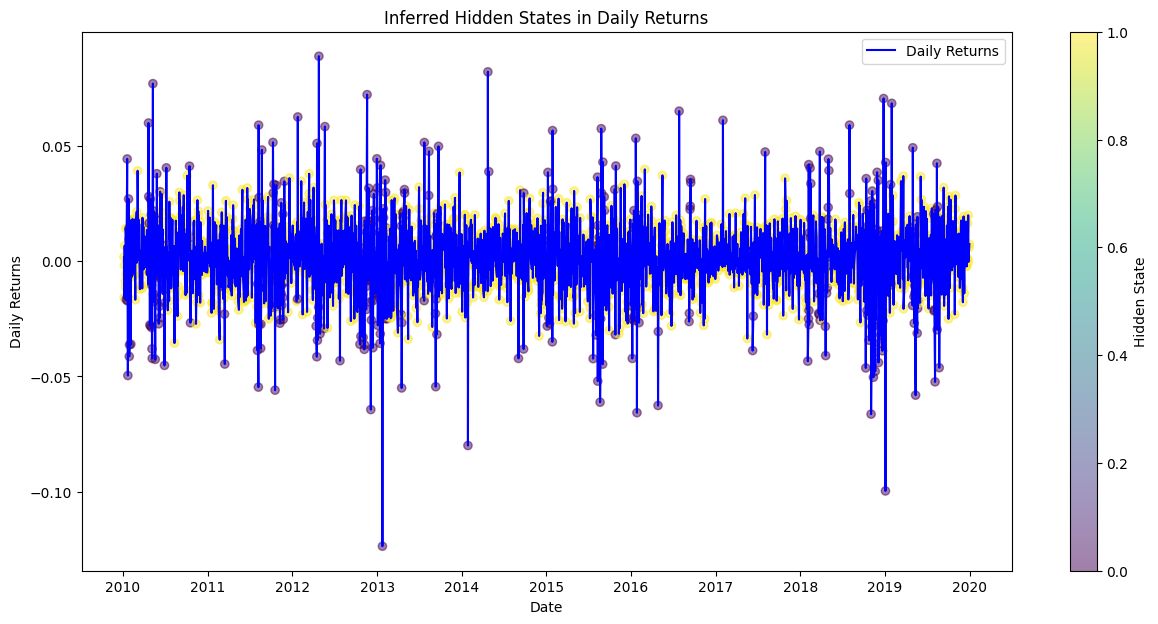

In [10]:
import matplotlib.pyplot as plt

# Plot daily returns
plt.figure(figsize=(15, 7))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', color='blue')

# Scatter plot the inferred hidden states
plt.scatter(daily_returns.index, daily_returns, c=hidden_states, cmap='viridis', marker='o', alpha=0.5)
plt.title('Inferred Hidden States in Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.colorbar(label='Hidden State')
plt.show()


In [11]:
# Evaluate the model's effectiveness
print("Log Likelihood:", model.score(returns))


Log Likelihood: 7005.483935367604


In [12]:
# Summarize hidden state characteristics
for i in range(len(means)):
    print(f"State {i+1}: Mean Return = {means[i][0]:.4f}, Variance = {covariances[i][0][0]:.4f}")


State 1: Mean Return = -0.0010, Variance = 0.0007
State 2: Mean Return = 0.0017, Variance = 0.0001


In [13]:
# Predict future state based on the latest inferred state
latest_state = hidden_states[-1]
future_state_probs = transition_matrix[latest_state]

# Print future state probabilities
print("Future State Probabilities:", future_state_probs)


Future State Probabilities: [0.05492182 0.94507818]
